In [1]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# Allows plots to appear directly in the notebook.
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [2]:
# Read txt file into Data Frame:
trips = pd.read_table('rt_trips_DB_2018.txt', keep_default_na=True, delimiter=';', skipinitialspace=True)

In [3]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"


In [4]:
trips.shape

(2182637, 16)

In [5]:
trips.dtypes

DATASOURCE          object
DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR     float64
ACTUALTIME_DEP     float64
BASIN               object
TENDERLOT          float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
NOTE                object
dtype: object

<h2>Add a Planned Departure Time in Hour format</h2>

In [6]:
trips['planDep_time'] = (trips['PLANNEDTIME_DEP'] / 3600).round()

In [7]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",24.0
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7.0
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9.0
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15.0
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23.0


In [8]:
# Replace any 24 hour values to zero
trips['planDep_time'] = np.where(trips['planDep_time'] == 24, 0, trips['planDep_time'])

In [9]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0.0
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7.0
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9.0
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15.0
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23.0


In [10]:
# Update planDep_time to int to rid of decimals
trips['planDep_time'] = trips['planDep_time'].astype('int')

In [11]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23


<h2>Add Month, Day, & Year Columns</h2>

In [12]:
trips['DAYOFSERVICE'] = trips['DAYOFSERVICE'].astype('datetime64')

In [13]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23


In [14]:
trips['DAYOFSERVICE'] = trips['DAYOFSERVICE'].astype('string')

In [15]:
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23


In [16]:
trips[['year', 'month', 'day']] = trips.DAYOFSERVICE.str.split('-', expand=True)
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time,year,month,day
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0,2018,02,07
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7,2018,02,07
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9,2018,02,07
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15,2018,02,07
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23,2018,02,07


<h2>Logical Integrity</h2><br>
- Test 1: Check for Null Values by Column: <br>
&nbsp;- TENDERLOT: All values missing <br>
&nbsp;- ACTUALTIME_ARR: 6.29% missing <br>
&nbsp;- ACTUALTIME_DEP: 7.54% missing <br>
&nbsp;- SUPPRESSED: 99.8% missing <br>
&nbsp;- JUSTIFICATIONID: 99.8% missing <br>

In [17]:
trips.isnull().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
BASIN                    0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
LASTUPDATE               0
NOTE                     0
planDep_time             0
year                     0
month                    0
day                      0
dtype: int64

- Test 2: Check for any future dates from DAYOFSERVICE: <br>
&nbsp;- All rows passed. <br>

In [18]:
test_2 = trips.year [trips.year >= '2022']
print('Number of rows failing test: ', test_2.shape[0])

Number of rows failing test:  0


- Test 3: Check for month values less than or equal to zero: <br>
&nbsp;- All rows passed. <br>

In [19]:
trips['month'] = trips['month'].astype('int32')
trips['day'] = trips['day'].astype('int32')

In [20]:
test_3 = trips.month [trips.month <= 0]
print('Number of rows failing test: ', test_3.shape[0])

Number of rows failing test:  0


- Test 4: Check for month values greater than 12: <br>
&nbsp;- All rows passed. <br>

In [21]:
test_4 = trips.month [trips.month > 12]
print('Number of rows failing test: ', test_4.shape[0])

Number of rows failing test:  0


- Test 5: Check for day values less than or equal to zero: <br>
&nbsp;- All rows passed. <br>

In [22]:
test_5 = trips.day [trips.day <= 0]
print('Number of rows failing test: ', test_5.shape[0])

Number of rows failing test:  0


- Test 6: Check for day values greater than 31: <br>
&nbsp;- All rows passed. <br>

In [23]:
test_6 = trips.day [trips.day > 31]
print('Number of rows failing test: ', test_6.shape[0])

Number of rows failing test:  0


- Test 7: Check for PLANNEDTIME_ARR values are not negative: <br>
&nbsp;- All rows passed. <br>

In [24]:
test_7 = trips.PLANNEDTIME_ARR [trips.PLANNEDTIME_ARR < 0]
print('Number of rows failing test: ', test_7.shape[0])

Number of rows failing test:  0


- Test 8: Check for PLANNEDTIME_DEP values are not negative: <br>
&nbsp;- All rows passed. <br>

In [25]:
test_8 = trips.PLANNEDTIME_DEP [trips.PLANNEDTIME_DEP < 0]
print('Number of rows failing test: ', test_8.shape[0])

Number of rows failing test:  0


- Test 9: Check for ACTUALTIME_ARR values are not negative: <br>
&nbsp;- All rows passed. <br>

In [26]:
test_9 = trips.ACTUALTIME_ARR [trips.ACTUALTIME_ARR < 0]
print('Number of rows failing test: ', test_9.shape[0])

Number of rows failing test:  0


- Test 10: Check for ACTUALTIME_DEP values are not negative: <br>
&nbsp;- All rows passed. <br>

In [27]:
test_10 = trips.ACTUALTIME_DEP [trips.ACTUALTIME_DEP < 0]
print('Number of rows failing test: ', test_10.shape[0])

Number of rows failing test:  0


- Test 11: Check for ACTUALTIME_ARR values are not missing: <br>
&nbsp;- 137207 failed (6.29% missing), need to drop. <br>

In [28]:
test_11 = trips.ACTUALTIME_ARR [trips.ACTUALTIME_ARR.isnull()]
print('Number of rows failing test: ', test_11.shape[0])

Number of rows failing test:  137207


- Test 12: Check for ACTUALTIME_DEP values are not missing: <br>
&nbsp;- 164551 failed (7.54% missing), need to replace with PLANNEDTIME_DEP. <br>

In [29]:
test_12 = trips.ACTUALTIME_DEP [trips.ACTUALTIME_DEP.isnull()]
print('Number of rows failing test: ', test_12.shape[0])

Number of rows failing test:  164551


- Test 13: Check that no rows are suppressed: <br>
&nbsp;- 4333 failed (.20% suppressed), need to drop these rows. <br>

In [30]:
test_13 = trips.SUPPRESSED [trips.SUPPRESSED == 0]
print('Number of rows failing test: ', test_13.shape[0])

Number of rows failing test:  4333


- Test 14: Check that no rows have justification IDs: <br>
&nbsp;- 4330 failed (.20% with faults), need to drop these rows. <br>

In [31]:
test_14 = trips.JUSTIFICATIONID [trips.JUSTIFICATIONID.notnull()]
print('Number of rows failing test: ', test_14.shape[0])

Number of rows failing test:  4330


- Test 15: Check that Datasource columns is not constant: <br>
&nbsp;- All rows failed. <br>

In [32]:
trips.DATASOURCE.value_counts()

DB    2182637
Name: DATASOURCE, dtype: int64

- Test 16: Check that BASIN columns is not constant: <br>
&nbsp;- All rows failed. <br>

In [33]:
trips.BASIN.value_counts()

BasDef    2182637
Name: BASIN, dtype: int64

- Test 17: Check that Year column is not constant: <br>
&nbsp;- All rows failed. <br>

In [34]:
trips.year.value_counts()

2018    2182637
Name: year, dtype: Int64

### Summary of data quality plan:

| Features                           | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| TENDERLOT                          | All values missing            | Drop / Exclude                 |
| DATASOURCE                         | Constant values               | Drop / Exclude                 |
| BASIN                              | Constant values               | Drop / Exclude                 |
| year                               | Constant values               | Drop / Exclude                 |
| SUPPRESSED                         | .21% rows suppressed          | Drop / Exclude Rows            |
| JUSTIFICATIONID                    | .21% rows with faults         | Drop / Exclude Rows            |
| ACTUALTIME_ARR                     | 6.29% missing                 | Drop / Exclude Rows            |
| ACTUALTIME_DEP                     | 7.54% missing                 | Drop / Exclude Rows            |
| Trip time features                 | Outliers                      | Drop / Exclude Rows            |

In [35]:
# Drop TENDERLOT
trips.drop('TENDERLOT', axis=1, inplace=True)
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time,year,month,day
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0,2018,2,7
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7,2018,2,7
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9,2018,2,7
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15,2018,2,7
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23,2018,2,7


In [36]:
trips.shape

(2182637, 19)

In [37]:
# Drop rows that have missing ACTUALTIME_ARR
trips.drop(trips[trips['ACTUALTIME_ARR'].isnull()].index, inplace = True)

In [38]:
trips.shape

(2045430, 19)

In [39]:
# Drop rows that have been suppressed
trips.drop(trips[trips['SUPPRESSED'] == 0].index, inplace = True)

In [40]:
trips.shape

(2043228, 19)

In [41]:
# Replace missing ACTUALTIME_DEP times with PLANNEDTIME_DEP
trips['ACTUALTIME_DEP'].fillna(trips['PLANNEDTIME_DEP'], inplace=True)
trips.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time,year,month,day
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0,2018,2,7
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7,2018,2,7
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9,2018,2,7
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15,2018,2,7
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23,2018,2,7


In [42]:
# Drop DATASOURCE
trips.drop('DATASOURCE', axis=1, inplace=True)
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time,year,month,day
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0,2018,2,7
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7,2018,2,7
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9,2018,2,7
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15,2018,2,7
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23,2018,2,7


In [43]:
trips.shape

(2043228, 18)

In [44]:
# Drop BASIN
trips.drop('BASIN', axis=1, inplace=True)
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time,year,month,day
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0,2018,2,7
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7,2018,2,7
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9,2018,2,7
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15,2018,2,7
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23,2018,2,7


In [45]:
trips.shape

(2043228, 17)

In [46]:
# Drop year
trips.drop('year', axis=1, inplace=True)
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time,month,day
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,NaN,28-FEB-18 12:05:11,",2967409,",0,2,7
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,NaN,NaN,28-FEB-18 12:05:11,",2580260,",7,2,7
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,NaN,28-FEB-18 12:05:11,",2448968,",9,2,7
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,NaN,28-FEB-18 12:05:11,",3094242,",15,2,7
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,NaN,28-FEB-18 12:05:11,",2526331,",23,2,7


In [47]:
trips.shape

(2043228, 16)

In [48]:
# Drop SUPPRESSED
trips.SUPPRESSED.value_counts()

Series([], Name: SUPPRESSED, dtype: int64)

In [49]:
trips.drop('SUPPRESSED', axis=1, inplace=True)
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,JUSTIFICATIONID,LASTUPDATE,NOTE,planDep_time,month,day
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,28-FEB-18 12:05:11,",2967409,",0,2,7
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,NaN,28-FEB-18 12:05:11,",2580260,",7,2,7
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,28-FEB-18 12:05:11,",2448968,",9,2,7
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,28-FEB-18 12:05:11,",3094242,",15,2,7
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,28-FEB-18 12:05:11,",2526331,",23,2,7


In [50]:
trips.shape

(2043228, 15)

In [51]:
# Drop JUSTIFICATIONID
trips.JUSTIFICATIONID.value_counts()

Series([], Name: JUSTIFICATIONID, dtype: int64)

In [52]:
trips.drop('JUSTIFICATIONID', axis=1, inplace=True)
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7


In [53]:
trips.shape

(2043228, 14)

<h2>Add Day of the Week Column</h2>

In [54]:
trips['DAYOFSERVICE'] = trips['DAYOFSERVICE'].astype('datetime64')

In [55]:
trips['dayOfWeek'] = trips['DAYOFSERVICE'].dt.dayofweek
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7,2
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7,2
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7,2
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7,2
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7,2


<h2>Add Late/Early Columns</h2>

In [56]:
# Arrival Differences
trips['arrival_diff'] = trips['ACTUALTIME_ARR'] - trips['PLANNEDTIME_ARR']
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek,arrival_diff
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7,2,279.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7,2,2235.0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7,2,817.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7,2,1202.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7,2,-701.0


In [57]:
# Departure Differences
trips['departure_diff'] = trips['ACTUALTIME_DEP'] - trips['PLANNEDTIME_DEP']
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7,2,279.0,0.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7,2,2235.0,0.0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7,2,817.0,-18.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7,2,1202.0,23.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7,2,-701.0,8.0


In [58]:
# Planned Duration
trips['planned_duration'] = trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7,2,279.0,0.0,2645
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7,2,2235.0,0.0,4057
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7,2,817.0,-18.0,3412
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7,2,1202.0,23.0,2841
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7,2,-701.0,8.0,3783


In [59]:
# Actual Duration
trips['actual_duration'] = trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP']
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7,2,279.0,0.0,2645,2924.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7,2,2235.0,0.0,4057,6292.0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7,2,817.0,-18.0,3412,4247.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7,2,1202.0,23.0,2841,4020.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7,2,-701.0,8.0,3783,3074.0


In [60]:
# Duration Difference
trips['duration_diff'] = trips['actual_duration'] - trips['planned_duration']
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7,2,279.0,0.0,2645,2924.0,279.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7,2,2235.0,0.0,4057,6292.0,2235.0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7,2,817.0,-18.0,3412,4247.0,835.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7,2,1202.0,23.0,2841,4020.0,1179.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7,2,-701.0,8.0,3783,3074.0,-709.0


<h2>Dealing with Outliers</h2>

In [61]:
trips.duration_diff.describe()

count    2.043228e+06
mean     3.352583e+02
std      5.844223e+02
min     -1.768600e+04
25%     -1.300000e+01
50%      2.600000e+02
75%      6.090000e+02
max      2.241700e+04
Name: duration_diff, dtype: float64

<AxesSubplot:>

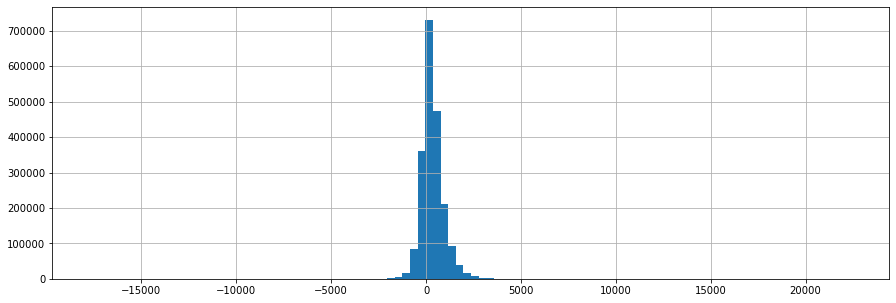

In [62]:
trips.duration_diff.hist(figsize=(15,5), bins=100)

In [63]:
upper_clamp = np.percentile(trips['duration_diff'], 99.85)
upper_clamp

3164.0

In [64]:
lower_clamp = np.percentile(trips['duration_diff'], 0.15)
lower_clamp

-1453.0

In [65]:
# Drop rows that duration_diff is greater than upper clamp
trips.drop(trips[trips['duration_diff'] > upper_clamp].index, inplace = True)

In [66]:
trips.shape

(2040166, 20)

In [67]:
# Drop rows that duration_diff is less than lower clamp
trips.drop(trips[trips['duration_diff'] < lower_clamp].index, inplace = True)

In [68]:
trips.shape

(2037102, 20)

Text(0, 0.5, 'Number of Trips')

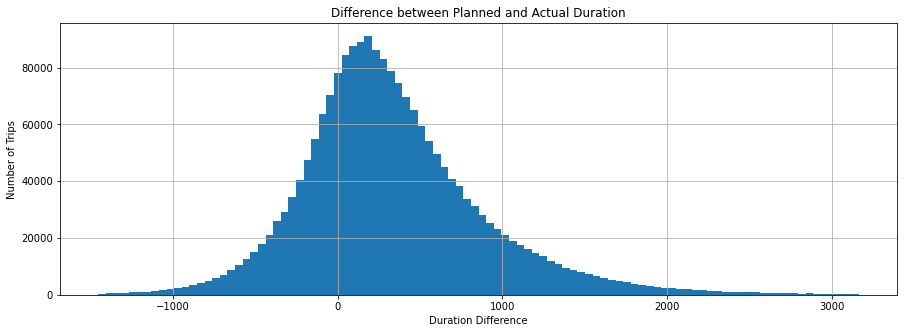

In [69]:
trips.duration_diff.hist(figsize=(15,5), bins=100)
plt.title('Difference between Planned and Actual Duration')
plt.xlabel('Duration Difference')
plt.ylabel('Number of Trips')

<h2>Data Exploration</h2>

Text(0, 0.5, 'Number of Trips')

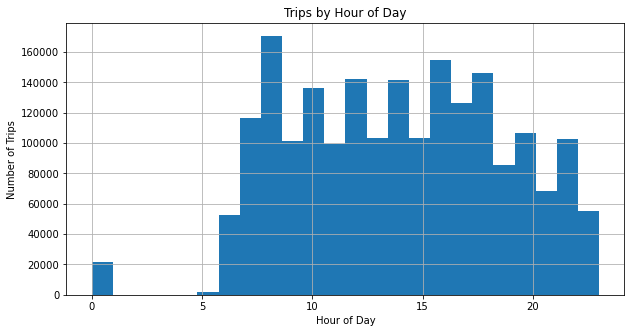

In [70]:
trips['planDep_time'] = trips['planDep_time'].astype('int32')

trips.planDep_time.hist(figsize=(10,5), bins=24)
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

Text(0, 0.5, 'Number of Trips')

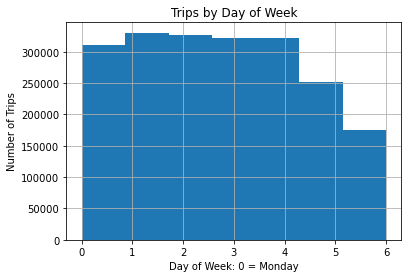

In [71]:
trips.dayOfWeek.hist(bins=7)
plt.title('Trips by Day of Week')
plt.xlabel('Day of Week: 0 = Monday')
plt.ylabel('Number of Trips')

<h3>Arrival Difference by Hour</h3>

<AxesSubplot:title={'center':'arrival_diff'}, xlabel='[planDep_time]'>

<Figure size 432x288 with 0 Axes>

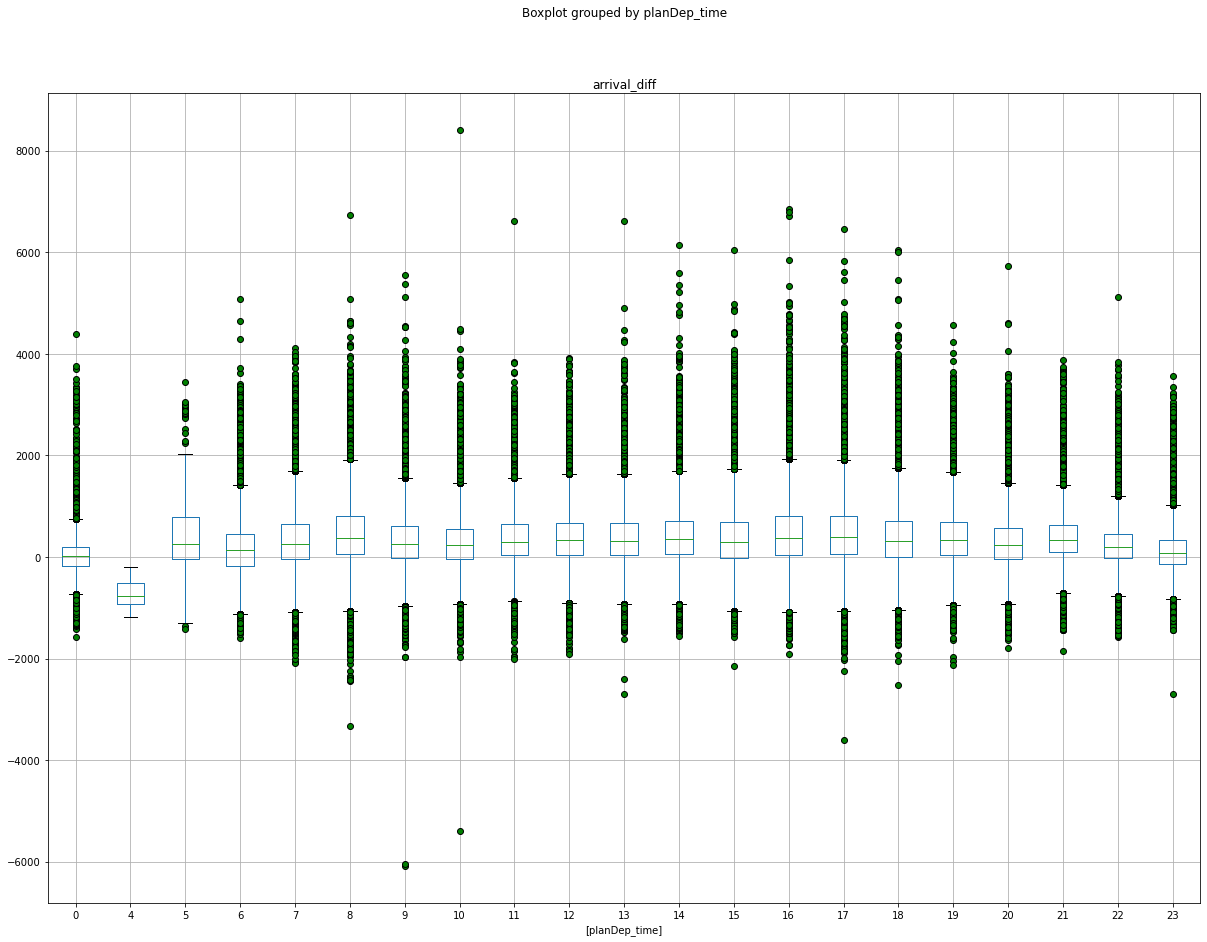

In [72]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
trips.boxplot(column=['arrival_diff'], by=['planDep_time'], flierprops=flierprops, figsize=(20,15))

<h3>Departure Difference by Hour</h3>

<AxesSubplot:title={'center':'departure_diff'}, xlabel='[planDep_time]'>

<Figure size 432x288 with 0 Axes>

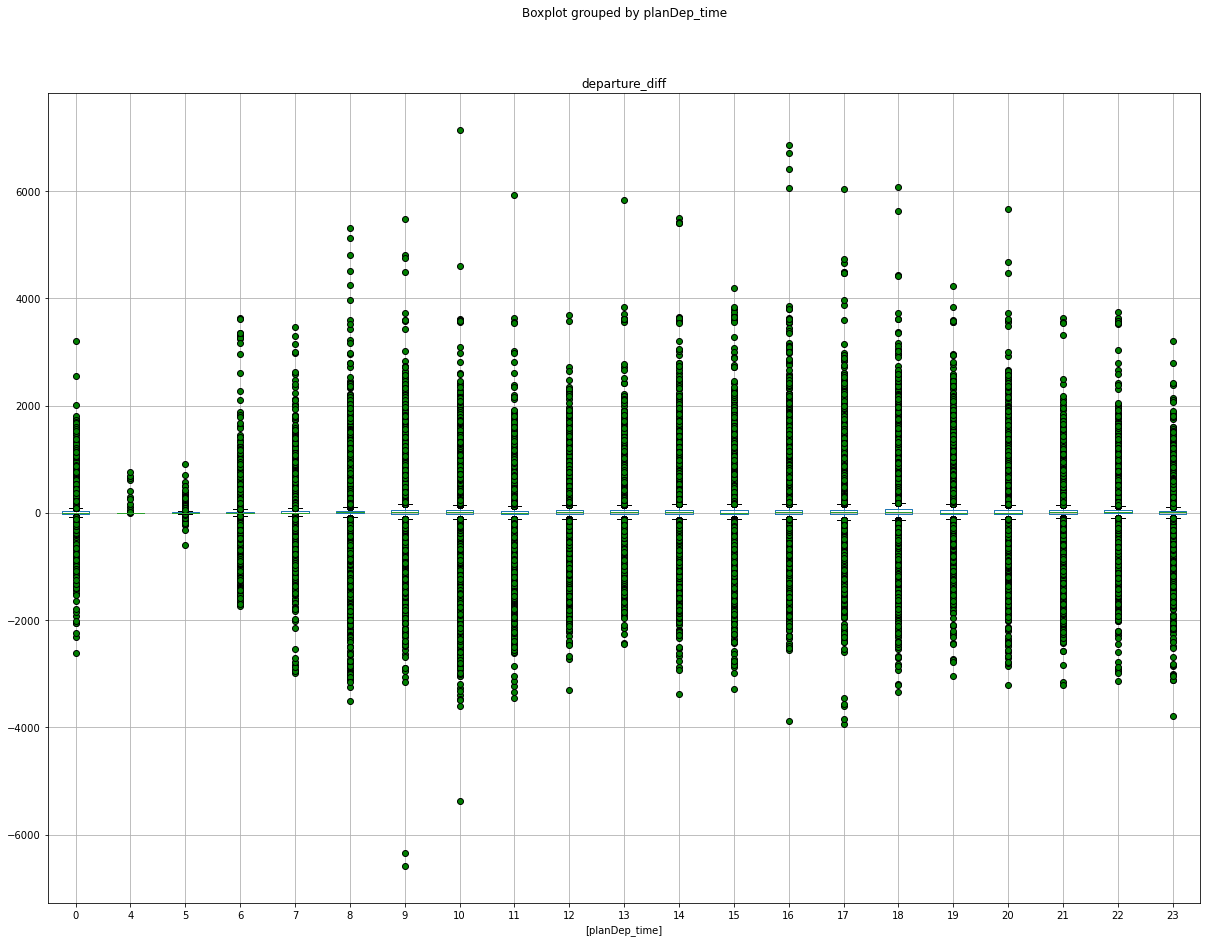

In [73]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
trips.boxplot(column=['departure_diff'], by=['planDep_time'], flierprops=flierprops, figsize=(20,15))

<h3>Duration Difference by Hour</h3>

<AxesSubplot:title={'center':'duration_diff'}, xlabel='[planDep_time]'>

<Figure size 432x288 with 0 Axes>

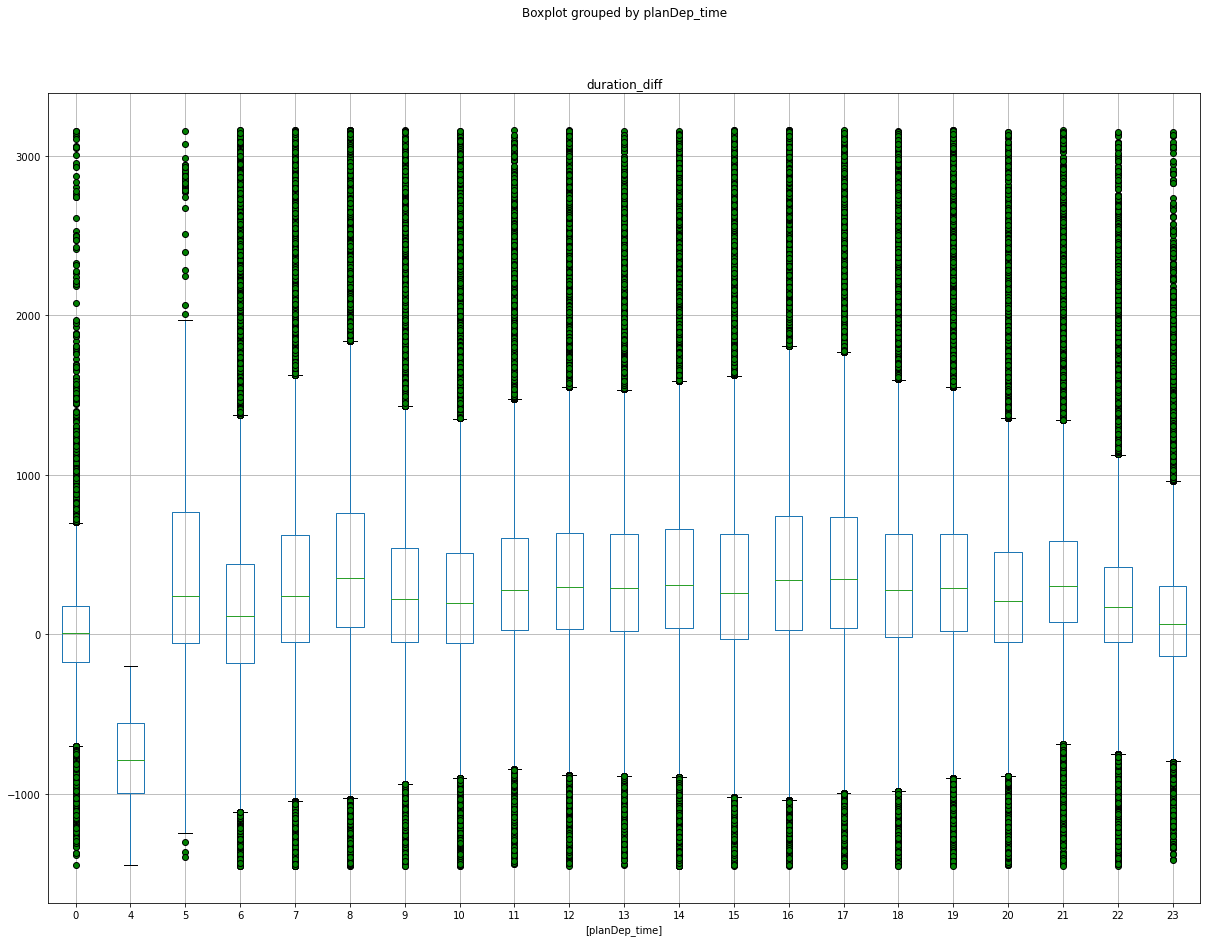

In [74]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
trips.boxplot(column=['duration_diff'], by=['planDep_time'], flierprops=flierprops, figsize=(20,15))

<h3>Duration Difference by Day of the Week</h3>

<AxesSubplot:title={'center':'duration_diff'}, xlabel='[dayOfWeek]'>

<Figure size 432x288 with 0 Axes>

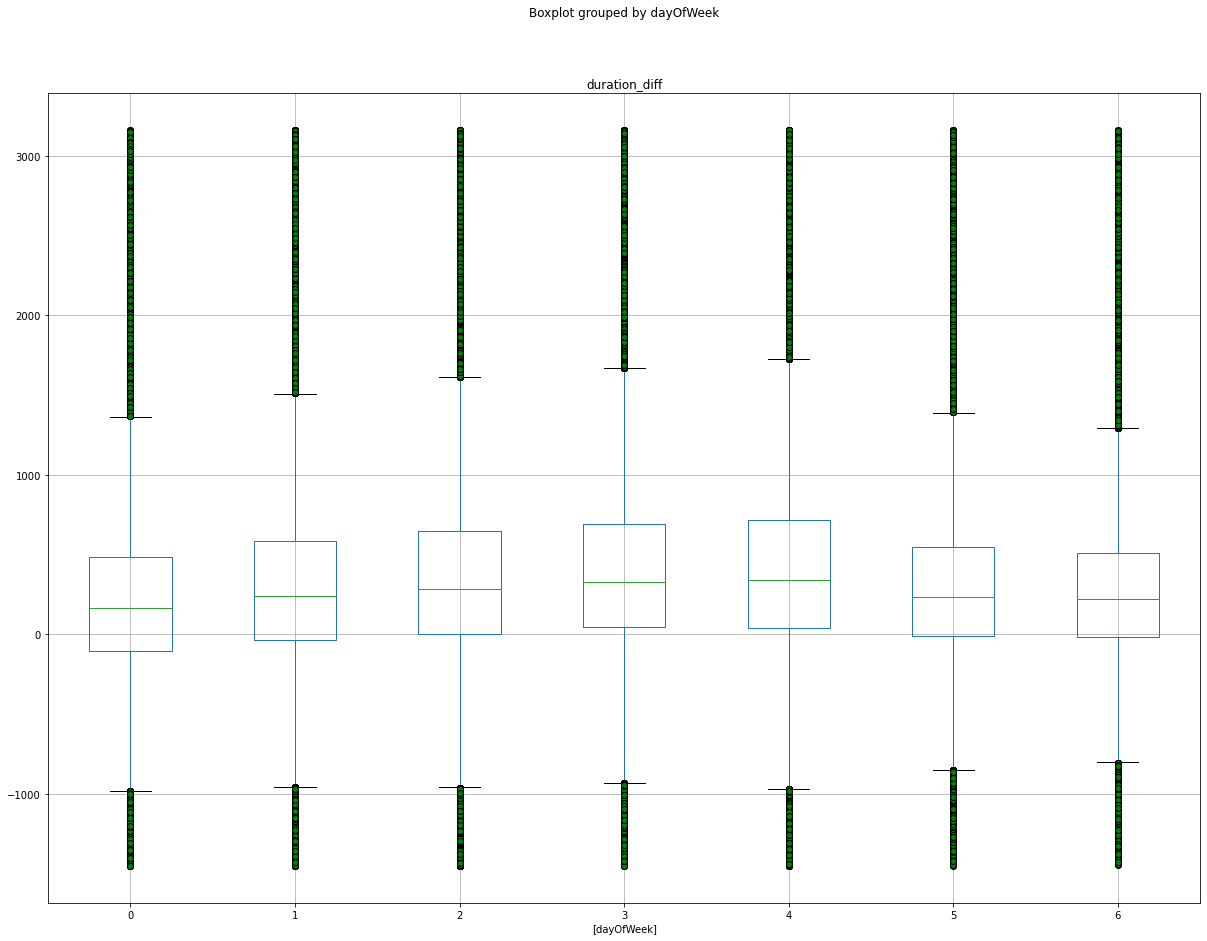

In [75]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
trips.boxplot(column=['duration_diff'], by=['dayOfWeek'], flierprops=flierprops, figsize=(20,15))

<h2>Data Types and Clean File</h2>

In [76]:
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,28-FEB-18 12:05:11,",2967409,",0,2,7,2,279.0,0.0,2645,2924.0,279.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,28-FEB-18 12:05:11,",2580260,",7,2,7,2,2235.0,0.0,4057,6292.0,2235.0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,28-FEB-18 12:05:11,",2448968,",9,2,7,2,817.0,-18.0,3412,4247.0,835.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,28-FEB-18 12:05:11,",3094242,",15,2,7,2,1202.0,23.0,2841,4020.0,1179.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,28-FEB-18 12:05:11,",2526331,",23,2,7,2,-701.0,8.0,3783,3074.0,-709.0


In [77]:
trips.dtypes

DAYOFSERVICE        datetime64[ns]
TRIPID                       int64
LINEID                      object
ROUTEID                     object
DIRECTION                    int64
PLANNEDTIME_ARR              int64
PLANNEDTIME_DEP              int64
ACTUALTIME_ARR             float64
ACTUALTIME_DEP             float64
LASTUPDATE                  object
NOTE                        object
planDep_time                 int32
month                        int32
day                          int32
dayOfWeek                    int64
arrival_diff               float64
departure_diff             float64
planned_duration             int64
actual_duration            float64
duration_diff              float64
dtype: object

In [79]:
trips['DIRECTION'] = trips['DIRECTION'].astype('int32')
trips['ACTUALTIME_ARR'] = trips['ACTUALTIME_ARR'].astype('int64')
trips['ACTUALTIME_DEP'] = trips['ACTUALTIME_DEP'].astype('int64')
trips['month'] = trips['month'].astype('int32')
trips['day'] = trips['day'].astype('int32')
trips['dayOfWeek'] = trips['dayOfWeek'].astype('int32')
trips['arrival_diff'] = trips['arrival_diff'].astype('int64')
trips['departure_diff'] = trips['departure_diff'].astype('int64')
trips['actual_duration'] = trips['actual_duration'].astype('int64')
trips['duration_diff'] = trips['duration_diff'].astype('int64')

In [80]:
trips.dtypes

DAYOFSERVICE        datetime64[ns]
TRIPID                       int64
LINEID                      object
ROUTEID                     object
DIRECTION                    int32
PLANNEDTIME_ARR              int64
PLANNEDTIME_DEP              int64
ACTUALTIME_ARR               int64
ACTUALTIME_DEP               int64
LASTUPDATE                  object
NOTE                        object
planDep_time                 int32
month                        int32
day                          int32
dayOfWeek                    int32
arrival_diff                 int64
departure_diff               int64
planned_duration             int64
actual_duration              int64
duration_diff                int64
dtype: object

In [81]:
trips.describe().T

,count,mean,std,min,25%,50%,75%,max
TRIPID,2037102.0,7.149272e+06,730607.046568,5955221.0,6593641.0,7110080.5,8017829.0,8592207.0
DIRECTION,2037102.0,1.504035e+00,0.499984,1.0,1.0,2.0,2.0,2.0
PLANNEDTIME_ARR,2037102.0,5.470255e+04,17343.091387,18203.0,39378.0,54781.0,68615.0,91364.0
PLANNEDTIME_DEP,2037102.0,5.117054e+04,17484.596048,16200.0,36000.0,51000.0,64800.0,87600.0
ACTUALTIME_ARR,2037102.0,5.506981e+04,17338.241746,17546.0,39686.0,55189.5,69025.0,92975.0
ACTUALTIME_DEP,2037102.0,5.120462e+04,17489.313886,16187.0,36000.0,51091.0,64816.0,88993.0
planDep_time,2037102.0,1.396238e+01,4.977433,0.0,10.0,14.0,18.0,23.0
month,2037102.0,6.413148e+00,3.408442,1.0,4.0,6.0,9.0,12.0
day,2037102.0,1.584242e+01,8.692829,1.0,8.0,16.0,23.0,31.0
dayOfWeek,2037102.0,2.717787e+00,1.878230,0.0,1.0,3.0,4.0,6.0


In [82]:
# Send cleaned df to csv:
trips.to_csv('cleaned_trips.csv', index=False)